# Task 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

The code given did not work with the retail sales dataset I found and hence the following modified code was used (to accommodate for the difference in the dataset):

In [ ]:
# Load dataset
data_sales = pd.read_csv("retail_sales_dataset.csv")  # Ensure file is in the working directory

# Feature selection (choosing relevant numerical and categorical variables)
data_sales['Date'] = pd.to_datetime(data_sales['Date'])  # Convert date to datetime format
data_sales['Month'] = data_sales['Date'].dt.month  # Extract month for seasonality insights

# Encoding categorical variables (Gender and Product Category)
data_sales = pd.get_dummies(data_sales, columns=['Gender', 'Product Category'], drop_first=True)

# Selecting features and target variable
X_sales = data_sales[['Age', 'Quantity', 'Price per Unit', 'Month'] + 
                     [col for col in data_sales.columns if 'Gender_' in col or 'Product Category_' in col]]
y_sales = data_sales['Total Amount']

# Splitting dataset
X_train_sales, X_test_sales, y_train_sales, y_test_sales = train_test_split(X_sales, y_sales, test_size=0.2, random_state=42)

# Model training
model_sales = LinearRegression()
model_sales.fit(X_train_sales, y_train_sales)

# Predictions
y_pred_sales = model_sales.predict(X_test_sales)

# Model evaluation
mse_sales = mean_squared_error(y_test_sales, y_pred_sales)
r2_sales = r2_score(y_test_sales, y_pred_sales)

# Print results
print(f"Sales Forecast - MSE: {mse_sales}")
print(f"Sales Forecast - R-squared: {r2_sales}")

Sales Forecast - MSE: 42061.03084510518
Sales Forecast - R-squared: 0.8563141885361015


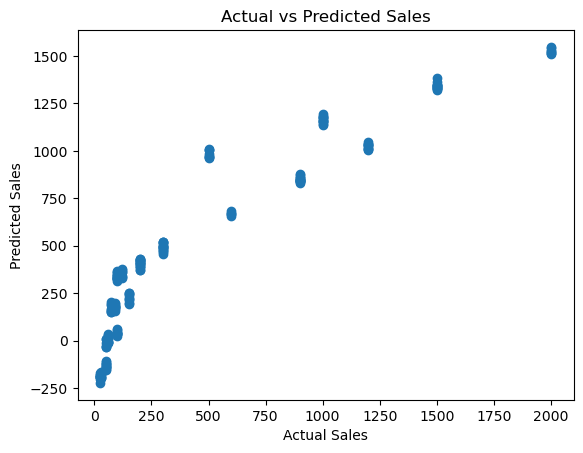

In [5]:
plt.scatter(y_test_sales, y_pred_sales)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()

# Task 2

In [7]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

The error in the given code was the expired link for the dataset

In [10]:
df = pd.read_csv("spam.csv", encoding='latin-1')

# Rename columns to match the dataset structure
df = df[['v1', 'v2']]
df.columns = ["label", "message"]

# Convert labels to binary (ham = 0, spam = 1)
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# Text Preprocessing
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

ps = PorterStemmer()
corpus = []

for msg in df['message'].dropna():  # Ensure no missing values
    msg = re.sub('[^a-zA-Z]', ' ', msg).lower().split()
    msg = [ps.stem(word) for word in msg if word not in stopwords.words('english')]
    corpus.append(" ".join(msg))

# Convert text into numerical features using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(corpus).toarray()
y = df['label'].values

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train SVM Model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Predict and Evaluate
y_pred = svm_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mahee\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


Accuracy: 0.97847533632287
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.98      0.86      0.91       150

    accuracy                           0.98      1115
   macro avg       0.98      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115



# Task 3

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [14]:
# Load dataset
df = pd.read_csv('churn.csv')  # Update with actual file path

# Display column names and check for missing values
print("Columns:", df.columns)
print("Missing Values:\n", df.isnull().sum())

# Fill missing values
df.fillna(df.select_dtypes(include=['number']).median(), inplace=True)


# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Encode categorical columns
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Define features (assuming no explicit 'Churn' column in test data)
X = df.drop(columns=['Churn'], errors='ignore')  # Ignore error if column not found

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# If training data has labels, split dataset
if 'Churn' in df.columns:
    y = df['Churn']
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    # Train logistic regression model
    model = LogisticRegression()
    model.fit(X_train, y_train)

    # Evaluate
    y_pred = model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
else:
    print("Dataset does not contain 'Churn' labels, skipping model training.")

Columns: Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'Usage Frequency',
       'Support Calls', 'Payment Delay', 'Subscription Type',
       'Contract Length', 'Total Spend', 'Last Interaction', 'Churn'],
      dtype='object')
Missing Values:
 CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64
Accuracy: 0.9780870393684712
Classification Report:
               precision    recall  f1-score   support

         0.0       0.97      0.98      0.97     38143
         1.0       0.98      0.98      0.98     50024

    accuracy                           0.98     88167
   macro avg       0.98      0.98      0.98     88167
weighted avg       0.98      0.98      0.98     88167



# Task 4

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Load dataset
df = pd.read_csv("https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv")

# Reduce dataset size for faster processing
df = df.sample(frac=0.1, random_state=42)

# Define features and target
X = df.drop(columns=['Class'])
y = df['Class']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train SVM Model
svm_model = SVC(kernel='rbf', C=1, gamma='scale')
svm_model.fit(X_train, y_train)

# Predict and Evaluate
y_pred = svm_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9989468141126909
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5691
           1       0.00      0.00      0.00         6

    accuracy                           1.00      5697
   macro avg       0.50      0.50      0.50      5697
weighted avg       1.00      1.00      1.00      5697



c:\Users\mahee\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\mahee\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\mahee\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
